In [150]:
import numpy as np
import librosa
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import os
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [151]:
df_train = pd.read_csv('metadata of train set .csv')
print(df_train.columns)
df_train.head(10)

Index(['Filename', 'File ID', 'Duration in ms', 'Class ID', 'Classname',
       'augmentation  id', 'Augmentation  type', 'source'],
      dtype='object')


,Filename,File ID,Duration in ms,Class ID,Classname,augmentation id,Augmentation type,source
0,108160-1_0_0.wav,108160,3730,0,breath,0,Orignal,https://freesound.org/
1,108160-2_0_0.wav,108160,4000,0,breath,0,Orignal,https://freesound.org/
2,108160-3_0_0.wav,108160,4000,0,breath,0,Orignal,https://freesound.org/
3,108160-4_0_0.wav,108160,2226,0,breath,0,Orignal,https://freesound.org/
4,146769-1_0_0.wav,146769,3540,0,breath,0,Orignal,https://freesound.org/
5,151215_0_0.wav,151215,3690,0,breath,0,Orignal,https://freesound.org/
6,162254-1_0_0.wav,162254,4000,0,breath,0,Orignal,https://freesound.org/
7,162254-2_0_0.wav,162254,4000,0,breath,0,Orignal,https://freesound.org/
8,164101-32_0_0.wav,164101,3860,0,breath,0,Orignal,https://freesound.org/
9,169222-1_0_0.wav,169222,3690,0,breath,0,Orignal,https://freesound.org/


Axes(0.125,0.11;0.775x0.77)
Augmentation  type
Orignal    6289
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6289 entries, 0 to 6288
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Filename        6289 non-null   object
 1   File ID         6289 non-null   object
 2   Duration in ms  6289 non-null   int64 
 3   Class ID        6289 non-null   int64 
 4   Classname       6289 non-null   object
 5   source          6289 non-null   object
dtypes: int64(2), object(4)
memory usage: 294.9+ KB
None


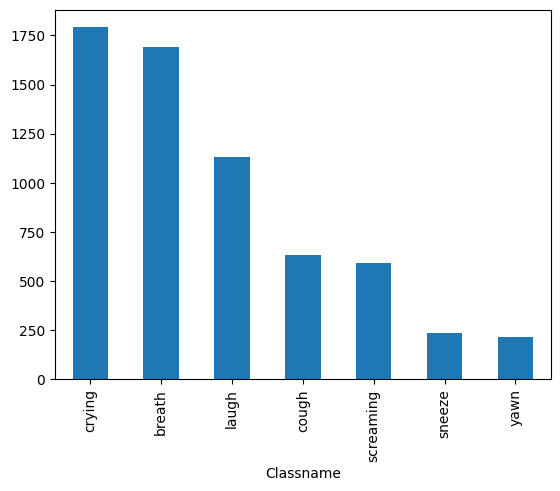

In [152]:
print(df_train['Classname'].value_counts().plot(kind='bar'))
print(df_train['Augmentation  type'].value_counts())
df_train.nunique()
df_train.drop([ 'augmentation  id','Augmentation  type'], axis=1, inplace=True)
print(df_train.info())

In [154]:
df_sample = df_train.groupby('Classname').head(10)
df_sample.reset_index(inplace=True)
df_sample.head(10)

,index,Filename,File ID,Duration in ms,Class ID,Classname,source
0,0,108160-1_0_0.wav,108160,3730,0,breath,https://freesound.org/
1,1,108160-2_0_0.wav,108160,4000,0,breath,https://freesound.org/
2,2,108160-3_0_0.wav,108160,4000,0,breath,https://freesound.org/
3,3,108160-4_0_0.wav,108160,2226,0,breath,https://freesound.org/
4,4,146769-1_0_0.wav,146769,3540,0,breath,https://freesound.org/
5,5,151215_0_0.wav,151215,3690,0,breath,https://freesound.org/
6,6,162254-1_0_0.wav,162254,4000,0,breath,https://freesound.org/
7,7,162254-2_0_0.wav,162254,4000,0,breath,https://freesound.org/
8,8,164101-32_0_0.wav,164101,3860,0,breath,https://freesound.org/
9,9,169222-1_0_0.wav,169222,3690,0,breath,https://freesound.org/


C:\Users\91820\AppData\Local\Temp\ipykernel_26876\440484108.py:11: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


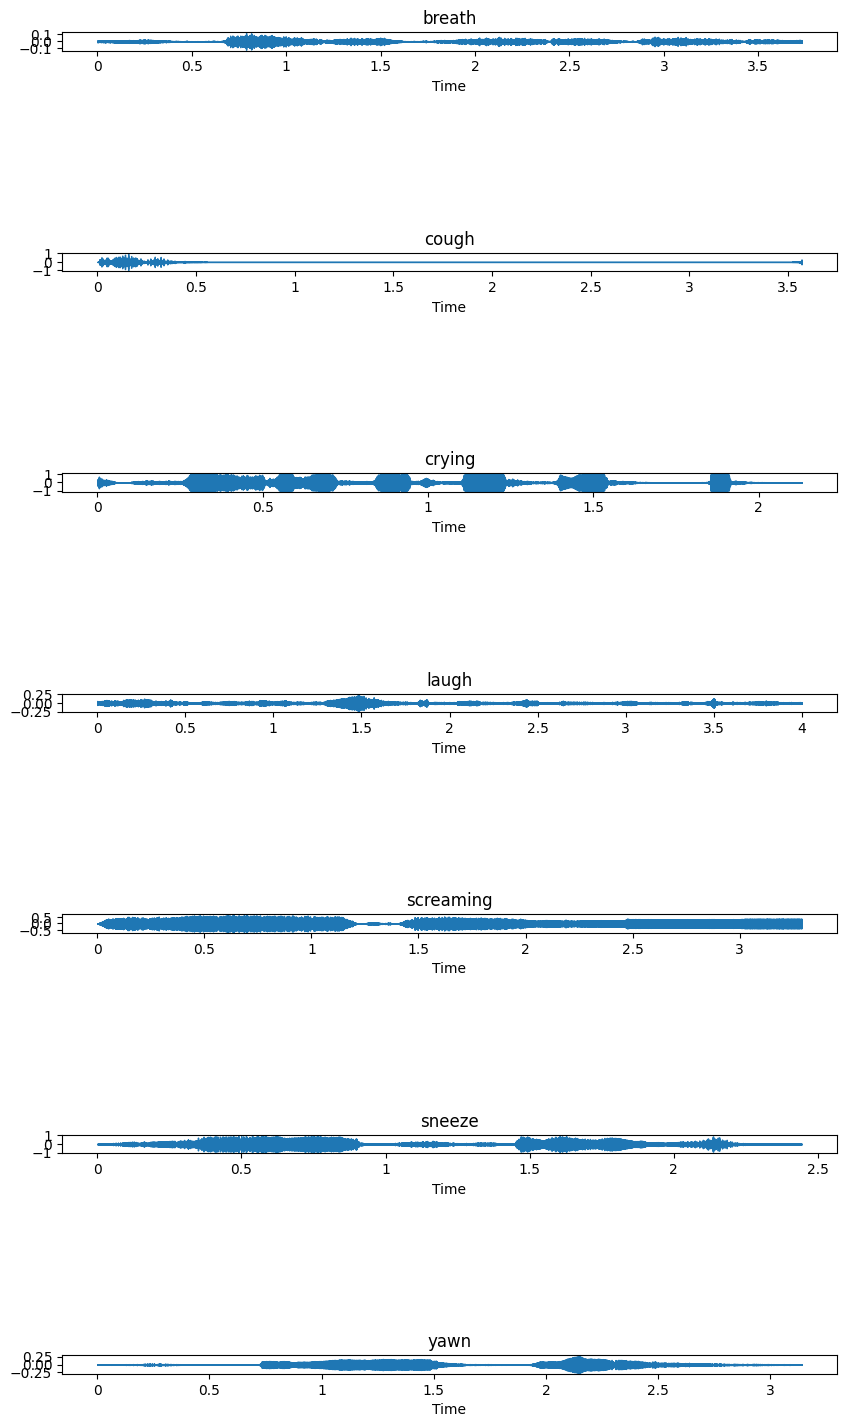

In [156]:
plt.figure(figsize=(10,20))
sounds ={}
for i in range(len(df_sample)):
    if i%10==0:
        path = 'train/' + df_sample['Filename'][i]
        y, sr = librosa.load(path, sr=None)
        sounds[df_sample['Classname'][i]]=y
        plt.subplot(len(df_sample),1,i+1)
        librosa.display.waveshow(y, sr=sr)
        plt.title(df_sample['Classname'][i])
plt.tight_layout()
plt.show()


In [157]:
plt.figure(figsize=(10,8))
sounds ={}
for i in range(len(df_sample)):
    path = 'train/' + df_sample['Filename'][i]
    y, sr = librosa.load(path, sr=None)
    if df_sample['Classname'][i] not in sounds:
        sounds[df_sample['Classname'][i]]=[]
    sounds[df_sample['Classname'][i]].append(y)
    # plt.subplot(len(df_sample),1,i+1)
    # librosa.display.waveshow(y, sr=sr)
    # plt.title(df_sample['Classname'][i])
# plt.tight_layout()
# plt.show()

<Figure size 1000x800 with 0 Axes>

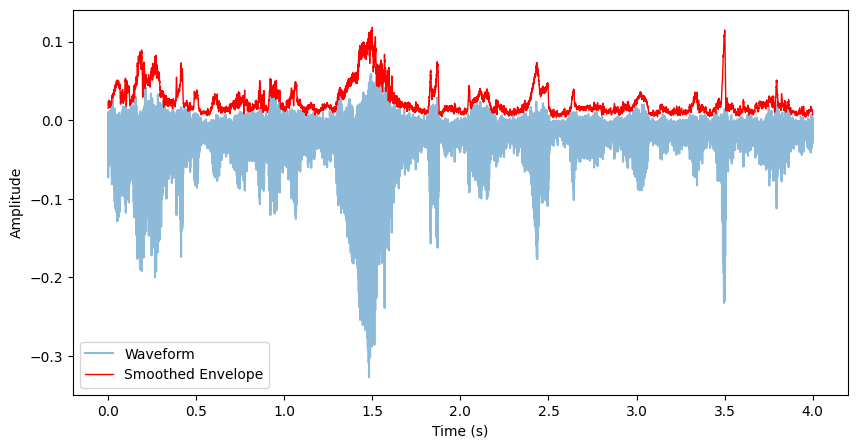

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Load an audio file
y = sounds['laugh'][0]
sr = 32000

# Compute the Hilbert transform
analytic_signal = hilbert(y)
envelope = np.abs(analytic_signal)

# Apply a moving average filter
window_size = 100  # Adjust this to control smoothing
smoothed_envelope = np.convolve(envelope, np.ones(window_size)/window_size, mode='same')

# Time axis
time = np.linspace(0, len(y) / sr, num=len(y))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(time, y-smoothed_envelope, alpha=0.5, label="Waveform")
plt.plot(time, smoothed_envelope, color='red', label="Smoothed Envelope", linewidth=1)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


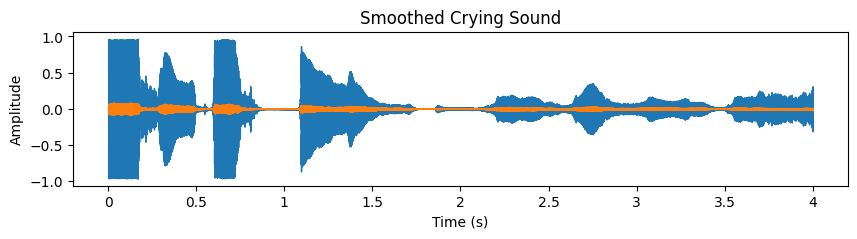

In [159]:
from IPython.display import Audio
sr = 32000
y = np.array(sounds['crying'][7])  # Replace this with your actual audio data
window_size = 100
y_smoothed = np.convolve(y, np.ones(window_size) / window_size, mode='same')  # 'same' to keep original length
plt.figure(figsize=(10, 2))
librosa.display.waveshow(y, sr=sr)
librosa.display.waveshow(y_smoothed, sr=sr)
plt.title("Smoothed Crying Sound")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()
Audio(data=y, rate=sr)
# Audio(data=y_smoothed, rate=sr)

In [ ]:
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

def extract_acoustic_features(y, sr):
    features = {}
    features["zcr"] = np.mean(librosa.feature.zero_crossing_rate(y))
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    features["pitch"] = np.mean(pitches[pitches > 0]) if np.any(pitches > 0) else 0
    features["rms"] = np.mean(librosa.feature.rms(y=y))
    features["duration"] = librosa.get_duration(y=y, sr=sr)
    features["centroid"] = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    features["bandwidth"] = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    features["contrast"] = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr))
    features["flatness"] = np.mean(librosa.feature.spectral_flatness(y=y))
    features["rolloff"] = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    features["mfcc"] = np.mean(mfcc, axis=1)
    delta_mfcc = librosa.feature.delta(mfcc)
    delta2_mfcc = librosa.feature.delta(mfcc, order=2)
    features["delta_mfcc"] = np.mean(delta_mfcc, axis=1)
    features["delta2_mfcc"] = np.mean(delta2_mfcc, axis=1)
    spectrogram = np.abs(librosa.stft(y))
    features["spectrogram"] = np.mean(spectrogram, axis=1)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    features["fbe"] = np.mean(mel_spec, axis=1)

    return features


In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List to store extracted feature dictionaries
features_list = []
labels = []

for sound in tqdm.tqdm(sounds):
    for i in range(len(sound)):
        y = sounds[sound][i]
        sr = 32000  # Ensure correct sampling rate
        features = extract_acoustic_features(y, sr)
        features["label"] = sound
        features_list.append(features)

# Convert to Pandas DataFrame
df_features = pd.DataFrame(features_list)


100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


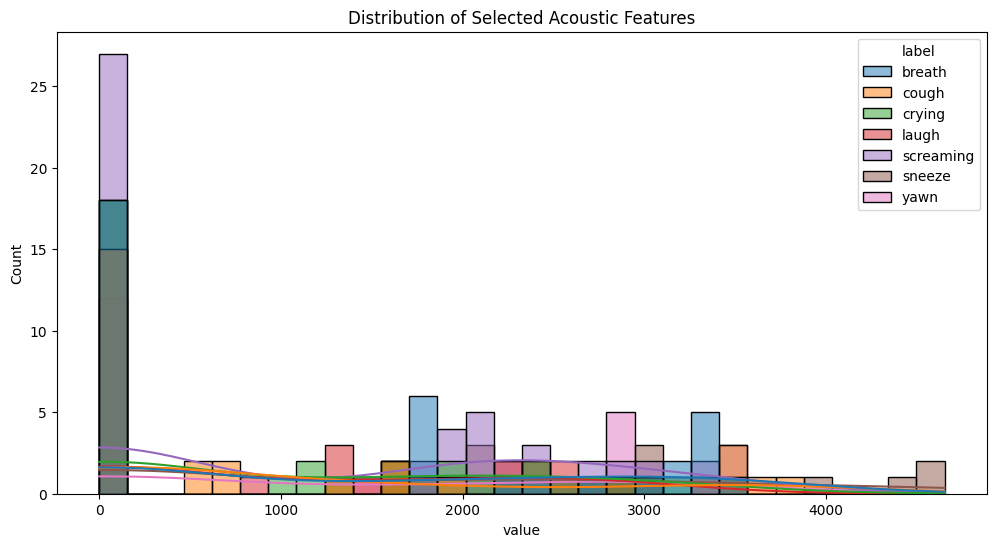

In [163]:
plt.figure(figsize=(12, 6))
selected_features = ["zcr", "rms", "pitch", "duration", "centroid", "bandwidth"]

df_melted = df_features.melt(id_vars=["label"], value_vars=selected_features)
sns.histplot(data=df_melted, x="value", hue="label", kde=True, bins=30)
plt.title("Distribution of Selected Acoustic Features")
plt.show()


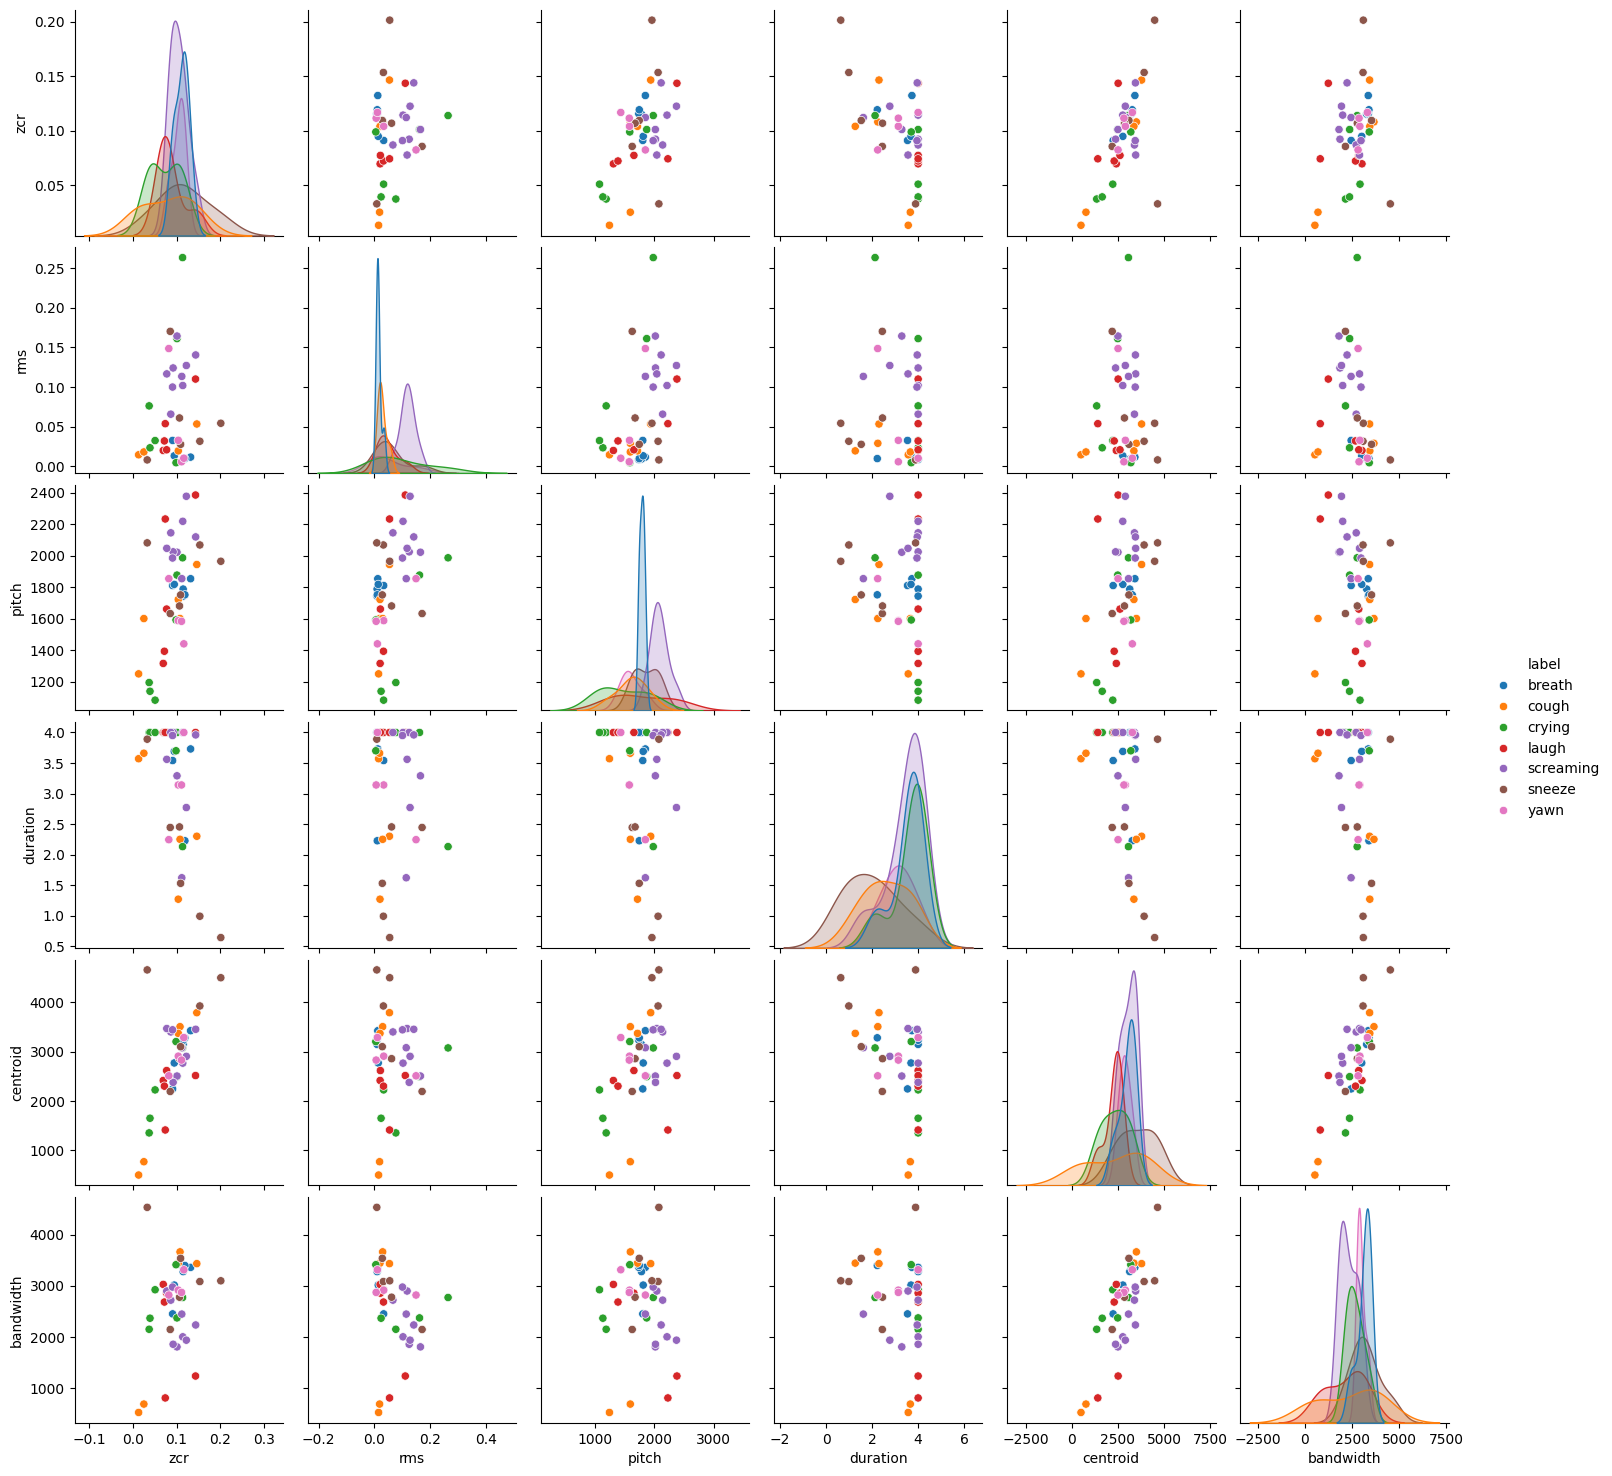

In [165]:
sns.pairplot(df_features[selected_features + ["label"]], hue="label", diag_kind="kde")
plt.show()

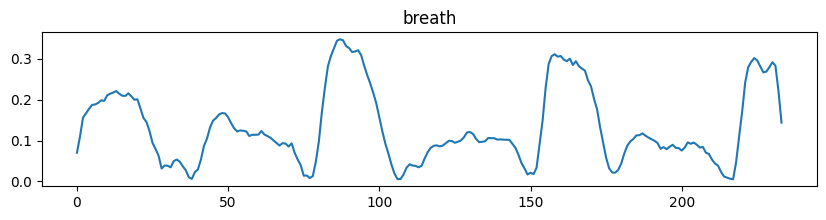

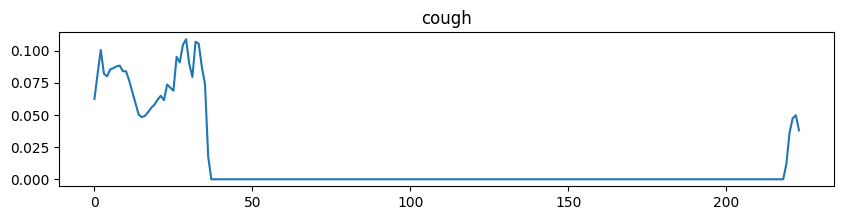

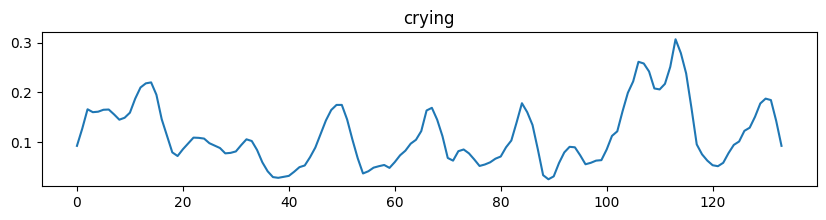

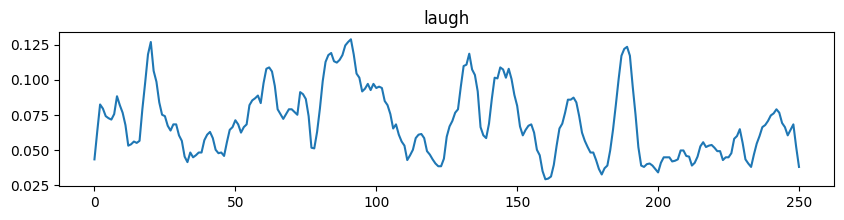

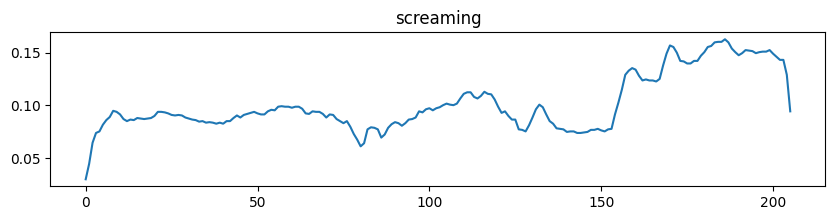

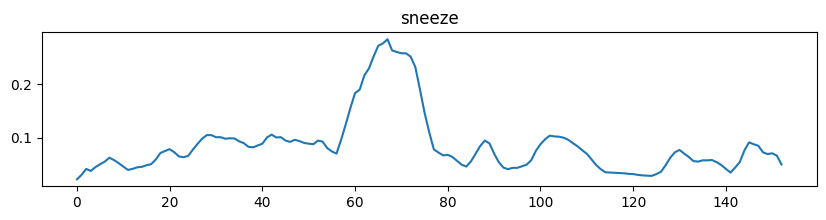

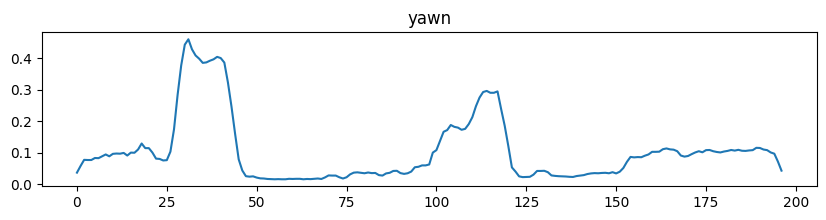

In [166]:
for sound in sounds:
    y = sounds[sound][0]
    zcr = librosa.feature.zero_crossing_rate(y)
    plt.figure(figsize=(10,2))
    plt.title(sound)
    plt.plot(np.array(zcr[0]))
plt.show()

In [ ]:
def extract_features(y, sr, n_mfcc=13):
    #Extract multiple features from each sound
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfcc, axis=1)  # Shape: (n_mfcc,)
    delta_mfcc = librosa.feature.delta(mfcc)
    delta_mfcc_mean = np.mean(delta_mfcc, axis=1)  # Shape: (n_mfcc,)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))  # Shape: (1,)
    rms = np.mean(librosa.feature.rms(y=y))  # Shape: (1,)
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))  # Shape: (1,)
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))  # Shape: (1,)
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch = np.mean(pitches[pitches > 0]) if np.any(pitches > 0) else 0  # Mean pitch value
    features = np.hstack((
        mfcc_mean, delta_mfcc_mean,  # MFCC & Delta
        [zcr, rms, spectral_centroid, spectral_bandwidth, pitch]  # Other features
    ))
    return features

features = []
labels = []

for i, row in tqdm.tqdm(df_train.iterrows(), desc='Loading : ', total=len(df_train)):
    path = 'train/' + row['Filename']
    y,sr=librosa.load(path)
    extracted_features = extract_features(y,sr)
    features.append(extracted_features)
    labels.append(row['Class ID'])

features = np.array(features)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
print("Final Feature Shape:", features_scaled.shape)  # Expected (num_samples, n_mfcc + 1)


Loading : 100%|██████████| 6289/6289 [04:37<00:00, 22.63it/s]

Final Feature Shape: (6289, 33)


In [128]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
X =features
y =labels

X = np.array(X) 
y = np.array(y) 
# # One-hot encode the labels
y = to_categorical(y, num_classes=7) 
print('Done')

Done


In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, Dense, Flatten, Lambda

# Define model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(31,1 )),
    BatchNormalization(),
    # MaxPooling1D(pool_size=4),
    Dropout(0.1),

    Conv1D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    Conv1D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    # MaxPooling1D(pool_size=4),
    Dropout(0.1),

    Conv1D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    Conv1D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=4),
    Dropout(0.2),

    Conv1D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    Conv1D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    Conv1D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'),
    BatchNormalization(),

    Lambda(lambda x: tf.reduce_mean(x, axis=1)),  # Global Average Pooling
    Dropout(0.2),

    Dense(7, activation='softmax')  # Output layer with 7 classes
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

c:\Users\91820\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_109 (Conv1D)             │ (None, 31, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_109         │ (None, 31, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_68 (Dropout)            │ (None, 31, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_110 (Conv1D)             │ (None, 31, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_110         │ (None, 31, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_111 (Conv1D)             │ (None, 31, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_111         │ (None, 31, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_69 (Dropout)            │ (None, 31, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_112 (Conv1D)             │ (None, 31, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_112         │ (None, 31, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_113 (Conv1D)             │ (None, 31, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_113         │ (None, 31, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_31 (MaxPooling1D) │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_70 (Dropout)            │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_114 (Conv1D)             │ (None, 7, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_114         │ (None, 7, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_115 (Conv1D)             │ (None, 7, 256)         │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_115         │ (None, 7, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_116 (Conv1D)             │ (None, 7, 256)         │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_116         │ (None, 7, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_12 (Lambda)              │ (None, 256)            │             

 Total params: 597,895 (2.28 MB)

 Trainable params: 595,463 (2.27 MB)

 Non-trainable params: 2,432 (9.50 KB)

In [139]:
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.utils import shuffle

# Shuffle training data before applying SMOTE
X_train, y_train = shuffle(X, y, random_state=42)
# Convert one-hot labels to class labels
y_train_labels = np.argmax(y_train, axis=1)
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_labels)

# Convert labels back to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_resampled = to_categorical(y_train_resampled, num_classes=7)

In [140]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = shuffle(X_train, y_train, random_state=42)
# Convert one-hot labels to class labels
y_train_labels = np.argmax(y_train, axis=1)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

model.fit(X_train_sm, y_train_sm, validation_data=(X_val, y_val), epochs=50, 
        #   class_weight=class_weights_dict
          )


Epoch 1/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.4094 - loss: 1.5639 - val_accuracy: 0.3593 - val_loss: 2.0630
Epoch 2/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.5841 - loss: 1.1536 - val_accuracy: 0.5517 - val_loss: 1.2529
Epoch 3/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.6329 - loss: 1.0001 - val_accuracy: 0.6335 - val_loss: 1.0319
Epoch 4/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6819 - loss: 0.8923 - val_accuracy: 0.6216 - val_loss: 1.1522
Epoch 5/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7225 - loss: 0.7787 - val_accuracy: 0.6677 - val_loss: 0.9547
Epoch 6/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.7616 - loss: 0.6898 - val_accuracy: 0.7234 - val_loss: 0.8437
Epoch 7/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7726 - loss: 0.6252 - val_accuracy: 0.7059 - val_loss: 0.8733
Epoch 8/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8066 - loss: 0.5379 - val_acc

In [134]:
from tensorflow.keras.callbacks import EarlyStopping
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)


history = model.fit(X_train_resampled, y_train_resampled, validation_split=0.2, 
                    # class_weight=class_weights, 
                    epochs=16, batch_size=32,
                    callbacks=[early_stopping]
                    )


Epoch 1/16


KeyboardInterrupt: 

In [141]:
print(df_train['Class ID'].value_counts())

Class ID
2    1791
0    1690
3    1133
1     632
4     593
5     236
6     214
Name: count, dtype: int64


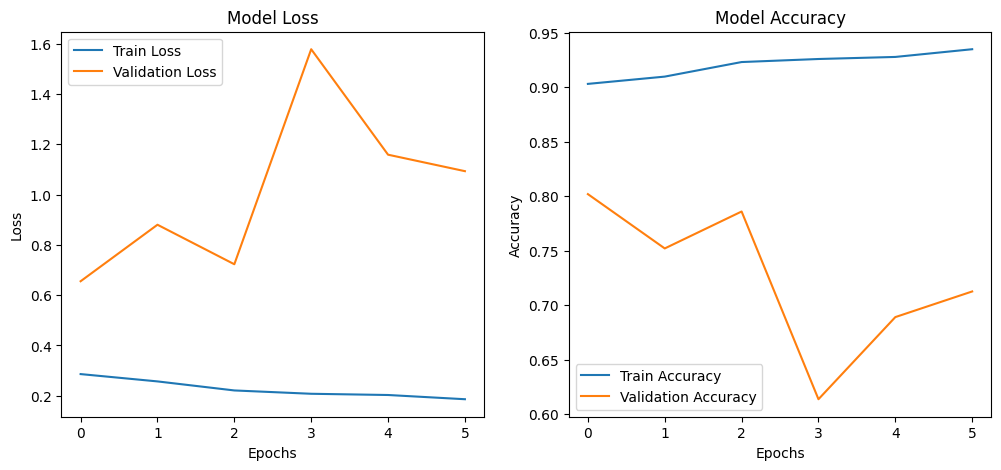

In [142]:
# Extract loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create the plot
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.show()


In [143]:
df_test =pd.read_csv('metadata of test set.csv')
df_test.drop([ 'Augment Id','Augmentation type'], axis=1, inplace=True)
df_test.head(5)

,Filename,File_ID,Durationin ms,Class_id,Classname,source
0,112557-2_0_0.wav,112557,4000,0,breath,https://freesound.org/
1,112557-3_0_0.wav,112557,3950,0,breath,https://freesound.org/
2,112557-4_0_0.wav,112557,3910,0,breath,https://freesound.org/
3,140301_0_0.wav,140301,2261,0,breath,https://freesound.org/
4,144128-1_0_0.wav,144128,3770,0,breath,https://freesound.org/


In [144]:
X_test =features_test_scaled
y_test =labels_test
X_test = np.array(X_test) 
y_test = np.array(y_test) 
# y_test = to_categorical(y_test, num_classes=7) 

In [148]:
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print((y_pred_classes==y_test).sum()/len(y_test))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
0.07448275862068965


In [146]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(classification_report(y_test, y_pred_classes)) 
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       160
           1       0.08      0.44      0.14        70
           2       0.00      0.00      0.00       205
           3       0.00      0.00      0.00       140
           4       0.02      0.03      0.02        70
           5       0.07      0.53      0.12        30
           6       0.25      0.10      0.14        50

    accuracy                           0.07       725
   macro avg       0.06      0.16      0.06       725
weighted avg       0.03      0.07      0.03       725

Precision: 0.0300
Recall: 0.0745
F1 Score: 0.0305


c:\Users\91820\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91820\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91820\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

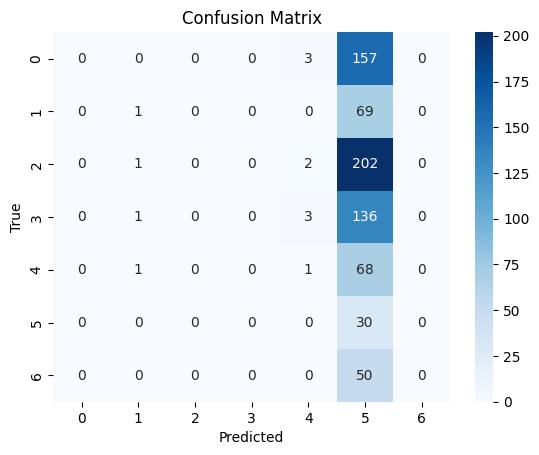

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# y_pred = model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_true = y_test

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(7), yticklabels=range(7))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [94]:
features_test = []
labels_test = []

for i, row in tqdm.tqdm(df_test.iterrows(), desc='Loading : ', total=len(df_test)):
    path = 'test/' + row['Filename']
    y,sr=librosa.load(path)
    extracted_features_test = extract_features(y,sr)
    features_test.append(extracted_features_test)
    labels_test.append(row['Class_id'])

# Convert to NumPy array
features_test = np.array(features_test)

# Standardize the features_test
scaler = StandardScaler()
features_test_scaled = scaler.fit_transform(features_test)

print("Final Feature Shape:", features_test_scaled.shape) 

Loading : 100%|██████████| 725/725 [00:25<00:00, 27.99it/s]

Final Feature Shape: (725, 29)
